# 自回归AR模型的理论

最简单的随机时间序列$\mu_t$是一具有零均值、同方差的独立分布序列：
$$
\mu_t = \epsilon_t, \epsilon_t \sim i.i.d.(0, \sigma_\epsilon^2)
$$
该序列常被称为一个白噪声（white noise）。由于$\mu_t$具有相同的均值与方差，且协方差为零，因此由定义可知，一个白噪声序列是平稳的，同时也是弱相关的。



## 1. p阶自回归AR模型
### 1.1 AR模型


$$
Y_t = \beta_0 + \beta_1Y_{t-1}+u_t
$$

$u_t$是白噪声序列，这个模型与简单线性回归模型有相同的形式，这个模型也叫作一阶自回归AR(1)模型。

从一阶扩展到AR(p)模型：

$$
Y_t = \beta_0 + \beta_1Y_{t-1}+\dots+\beta_pY_{t-p}+u_t
$$

### 1.2 $\beta_1$取不同值
当$\beta_1$ > 1时，尝试令$\beta_1=1.5$,$u$为均值为5，方差为10的正态分布。请尝试修改参数重新绘图，并观察结果。

<AxesSubplot:>

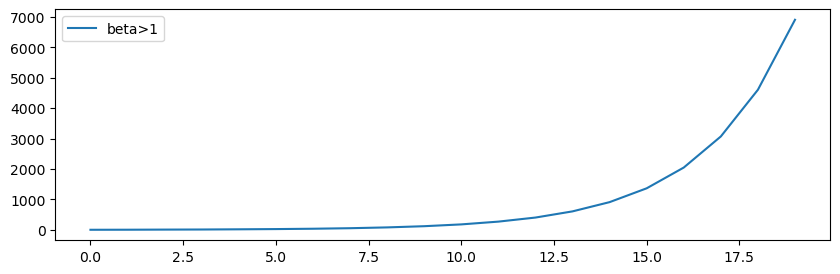

In [91]:
import pandas as pd
import random
import numpy as np
b1 = 1.5
Y = {}
Y[0]=1
for i in range(1, 20):
    Y[i] = Y[i-1] * b1 + np.random.normal(0,1)
pd.Series(Y).plot(figsize=(10,3), label='beta>1', legend=True)

当$\beta_1$ =1时，我们修改循环的次数为200，从更长的时间区间去观察其走势。

<AxesSubplot:>

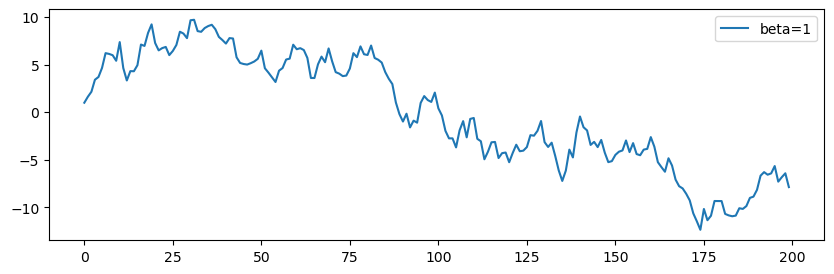

In [104]:
b1 = 1
Y = {}
Y[0]=1
for i in range(1, 200):
    Y[i] = Y[i-1] * b1 + np.random.normal(0,1)
pd.Series(Y).plot(figsize=(10,3), label='beta=1', legend=True)

当$\beta_1$ <1时，我们修改循环的次数为2000次，从更长的时间区间去观察其走势。

<AxesSubplot:>

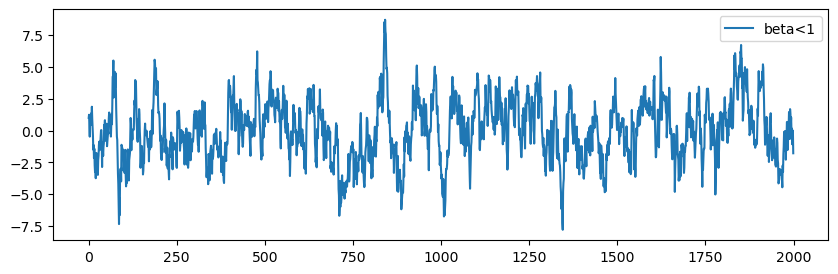

In [97]:
b1 = 0.9
Y = {}
Y[0]=1
for i in range(1, 2000):
    Y[i] = Y[i-1] * b1 + np.random.normal(0,1)
pd.Series(Y).plot(figsize=(10,3), label='beta<1', legend=True)

## 2.AR(p)模型的平稳性检验

### 2.1 DF检验

随机游走序列：
$$
Y_t = Y_{t-1} + u_t
$$

可以看作是
$$
Y_t = \beta Y_{t-1} + u_t, \beta=1
$$
检验$\beta$是否小于1
$$
\Delta Y_{t} =(\beta-1)Y_{t-1}+u_t=\delta Y_{t-1}+u_t
$$
或者检验$\delta$是否小于0。

下面使用假设检验的方法，检验系数$\delta$。首先，建立原假设$H_0:\delta=0$，备择假设$H_1:\delta<0$。这可以通过普通最小二乘法下的t检验完成。

由于在序列非平稳时，即使在大样本下统计量也是有偏误的，通常的t检验无法使用。Dicky和Fuller于1976年提出了这一情形下，t统计量服从的分布，即DF分布。

检验采用普通最小二乘法，计算t统计量的值，与DF分布表中给定的显著性水平下的临界值比较。

如果t统计量的值小于临界值（左尾单侧检验，这意味着）$\delta$足够小，则拒绝原假设$H_0:\delta=0$，认为时间序列不存在单位根，是平稳的。

|显著性水平|DF分布临界值样本容量$\infty$ |t分布临界值|
|---|---|---|
|0.01|-3.43|-2.33|
|0.05|-2.86|-1.65|
|0.10|-2.57|-1.28|

使用软件计算时，一般给出DF分布的临界值。

### 2.2 ADF检验

上述对1阶自回归AR(1)时间序列进行平稳性检验。单实际检验中，时间序列可能由更高阶的自回归过程生成，或者随机干扰项并非是白噪声，这样使用普通最小二乘法进行估计得到的t统计量的渐近分布会收到无关参数的干扰，导致DF检验失效。

另外，如果时间序列包含有明显的随时间变化的某种趋势，如上升或下降，则DF检验必须保证能够去除这些趋势，否则时间趋势成分会进入干扰项。

Dicky和Fuller对DF检验进行了扩充，形成了ADF检验(augment Dickey-Fuller test)。

ADF检验通过下面三种模型完成：

模型1:
$$
\Delta Y_t = \delta Y_{t-1} + \sum^{m}_{i=1}\beta_i \Delta Y_{t-i} + \varepsilon_t
$$

模型2:
$$
\Delta Y_t = \alpha + \delta Y_{t-1} + \sum^{m}_{i=1}\beta_i \Delta Y_{t-i} + \varepsilon_t
$$

模型3:
$$
\Delta Y_t = \alpha + \beta T + \delta Y_{t-1} + \sum^{m}_{i=1}\beta_i \Delta Y_{t-i} + \varepsilon_t
$$

模型1不含任何确定性趋势；模型2仅含有截距$\alpha$；模型3中的T是时间变量，代表了时间序列随时间变化的某种趋势，同时含有截距$\alpha$，该模型是为了保证除去时间序列中的所有确定性趋势。

模型1、2、3都增加了$\Delta Y$的滞后项，是为了消除时间序列由更高阶的自回归过程生成时模型随机干扰项的序列相关，保证随机干扰项是白噪声。

一个简单的检验是同时估计出上述三个模型的适当形式，然后通过ADF临界值表来检验原假设$H_0:\delta=0$。只要其中一个模型的检验结果拒绝了原假设，就可以认为时间序列是平稳的。当三个模型的结果都不能拒绝原假设时，则认为时间序列是非平稳的。